In [5]:
import numpy as np
from PIL import Image, ImageDraw

N, M = 2, 3
if N < M:
    N, M = M, N

Xmax, Ymax = 2048, 4096
SQUARE_SIZE = max(2, min(Xmax // N, Ymax // M))

first_row = np.zeros((M, M+1), dtype=bool)
for j in range(M):
    first_row[j, j] = True
second_row = np.zeros((M, M+1), dtype=bool)
second_row[0] = np.logical_xor(first_row[0], first_row[1])
second_row[0, -1] = True
second_row[-1] = np.logical_xor(first_row[-1], first_row[-2])
second_row[-1, -1] = True
for j in range(1, M-1):
    second_row[j] = np.logical_xor(np.logical_xor(first_row[j-1], first_row[j+1]), first_row[j])
    second_row[j, -1] = True

for i in range(2, N):
    third_row = np.zeros((M, M+1), dtype=bool)
    third_row[0] = np.logical_xor(np.logical_xor(second_row[0], second_row[1]), first_row[0])
    third_row[0, -1] = not third_row[0, -1]
    third_row[-1] = np.logical_xor(np.logical_xor(second_row[-1], second_row[-2]), first_row[-1])
    third_row[-1, -1] = not third_row[-1, -1]
    for j in range(1, M-1):
        third_row[j] = np.logical_xor(np.logical_xor(second_row[j], first_row[j]),
                                      np.logical_xor(second_row[j-1], second_row[j+1]))
        third_row[j, -1] = not third_row[j, -1]
    first_row, second_row = second_row, third_row

system = np.zeros((M, M+1), dtype=bool)
system[0] = np.logical_xor(np.logical_xor(second_row[0], second_row[1]), first_row[0])
system[0, -1] = not system[0, -1]
system[-1] = np.logical_xor(np.logical_xor(second_row[-1], second_row[-2]), first_row[-1])
system[-1, -1] = not system[-1, -1]
for j in range(1, M-1):
    system[j] = np.logical_xor(np.logical_xor(second_row[j], first_row[j]),
                               np.logical_xor(second_row[j-1], second_row[j+1]))
    system[j, -1] = not system[j, -1]
unseeneq = 0
solution = np.ones(M, dtype=bool)
for var in range(M):
    eq = unseeneq
    while (eq < M) and (not system[eq, var]):
        eq += 1
    if eq == M:
        solution[var] = False
    else:
        system[[eq, unseeneq]] = system[[unseeneq, eq]]
        eq = unseeneq
        unseeneq += 1
        for j in range(eq):
            if system[j, var]:
                system[j] = np.logical_xor(system[j], system[eq])
        for j in range(unseeneq, M):
            if system[j, var]:
                system[j] = np.logical_xor(system[j], system[eq])


no_sol = False
for j in range(unseeneq, M):
    if np.any(system[j][:M]):
        print("You solved it incorrectly")
    if system[j, -1]:
        no_sol = True
if no_sol:
    print("No solution")
else:
    var = 0
    for i in range(unseeneq):
        while not solution[var]:
            var += 1
        solution[var] = system[i, -1]
        var += 1
    print(1 << (M - unseeneq), "solutions")
    field = np.zeros((N, M), dtype=bool)
    field[0] = solution
    field[1, 0] = (field[0, 0] == field[0, 1])
    field[1, -1] = (field[0, -1] == field[0, -2])
    for j in range(1, M-1):
        field[1, j] = not (field[0, j] == (field[0, j-1] == field[0, j+1]))
    for i in range(2, N):
        field[i, 0] = not (field[i-2, 0] == (field[i-1, 0] == field[i-1, 1]))
        field[i, -1] = not (field[i-2, -1] == (field[i-1, -1] == field[i-1, -2]))
        for j in range(1, M-1):
            field[i, j] = ((field[i-1, j]==field[i-2, j]) == (field[i-1, j-1]==field[i-1, j+1]))
    
    img = Image.new("1", (SQUARE_SIZE * N, SQUARE_SIZE * M))
    imgdraw = ImageDraw.Draw(img)
    for i in range(N):
        for j in range(M):
            if field[i, j]:
                imgdraw.rectangle([i*SQUARE_SIZE, j*SQUARE_SIZE, (i+1)*SQUARE_SIZE-1, (j+1)*SQUARE_SIZE-1], fill="white")
    img.save("Solution_" + str(N) + "x" + str(M) + ".png")

4 solutions


In [9]:
# number of solutions
import numpy as np
from tqdm.notebook import tqdm

MINUS_INF = -1000
max_num = 100
num_sol_log = np.zeros((max_num+1, max_num+1), dtype=int)
for i in range(2, max_num+1, 3):
    num_sol_log[1, i] = 1
    num_sol_log[i, 1] = 1

for M in tqdm(range(2, max_num+1)):
    for N in range(M, max_num+1):
        first_row = np.zeros((M, M+1), dtype=bool)
        for j in range(M):
            first_row[j, j] = True
        second_row = np.zeros((M, M+1), dtype=bool)
        second_row[0] = np.logical_xor(first_row[0], first_row[1])
        second_row[0, -1] = True
        second_row[-1] = np.logical_xor(first_row[-1], first_row[-2])
        second_row[-1, -1] = True
        for j in range(1, M-1):
            second_row[j] = np.logical_xor(np.logical_xor(first_row[j-1], first_row[j+1]), first_row[j])
            second_row[j, -1] = True

        for i in range(2, N):
            third_row = np.zeros((M, M+1), dtype=bool)
            third_row[0] = np.logical_xor(np.logical_xor(second_row[0], second_row[1]), first_row[0])
            third_row[0, -1] = not third_row[0, -1]
            third_row[-1] = np.logical_xor(np.logical_xor(second_row[-1], second_row[-2]), first_row[-1])
            third_row[-1, -1] = not third_row[-1, -1]
            for j in range(1, M-1):
                third_row[j] = np.logical_xor(np.logical_xor(second_row[j], first_row[j]),
                                              np.logical_xor(second_row[j-1], second_row[j+1]))
                third_row[j, -1] = not third_row[j, -1]
            first_row, second_row = second_row, third_row

        system = np.zeros((M, M+1), dtype=bool)
        system[0] = np.logical_xor(np.logical_xor(second_row[0], second_row[1]), first_row[0])
        system[0, -1] = not system[0, -1]
        system[-1] = np.logical_xor(np.logical_xor(second_row[-1], second_row[-2]), first_row[-1])
        system[-1, -1] = not system[-1, -1]
        for j in range(1, M-1):
            system[j] = np.logical_xor(np.logical_xor(second_row[j], first_row[j]),
                                       np.logical_xor(second_row[j-1], second_row[j+1]))
            system[j, -1] = not system[j, -1]
        unseeneq = 0
        solution = np.ones(M, dtype=bool)
        for var in range(M):
            eq = unseeneq
            while (eq < M) and (not system[eq, var]):
                eq += 1
            if eq == M:
                solution[var] = False
            else:
                system[[eq, unseeneq]] = system[[unseeneq, eq]]
                eq = unseeneq
                unseeneq += 1
                for j in range(eq):
                    if system[j, var]:
                        system[j] = np.logical_xor(system[j], system[eq])
                for j in range(unseeneq, M):
                    if system[j, var]:
                        system[j] = np.logical_xor(system[j], system[eq])


        no_sol = False
        for j in range(unseeneq, M):
            if np.any(system[j][:M]):
                print("You solved it incorrectly")
            if system[j, -1]:
                no_sol = True
        if no_sol:
            num_sol_log[N, M] = num_sol_log[M, N] = MINUS_INF
        else:
            num_sol_log[N, M] = num_sol_log[M, N] = M - unseeneq

  0%|          | 0/99 [00:00<?, ?it/s]

[[ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  1  0  0]
 [ 0  1  0 ...  0  2  0]
 ...
 [ 0  1  0 ... 20  2  0]
 [ 0  0  2 ...  2 16  0]
 [ 0  0  0 ...  0  0  0]]


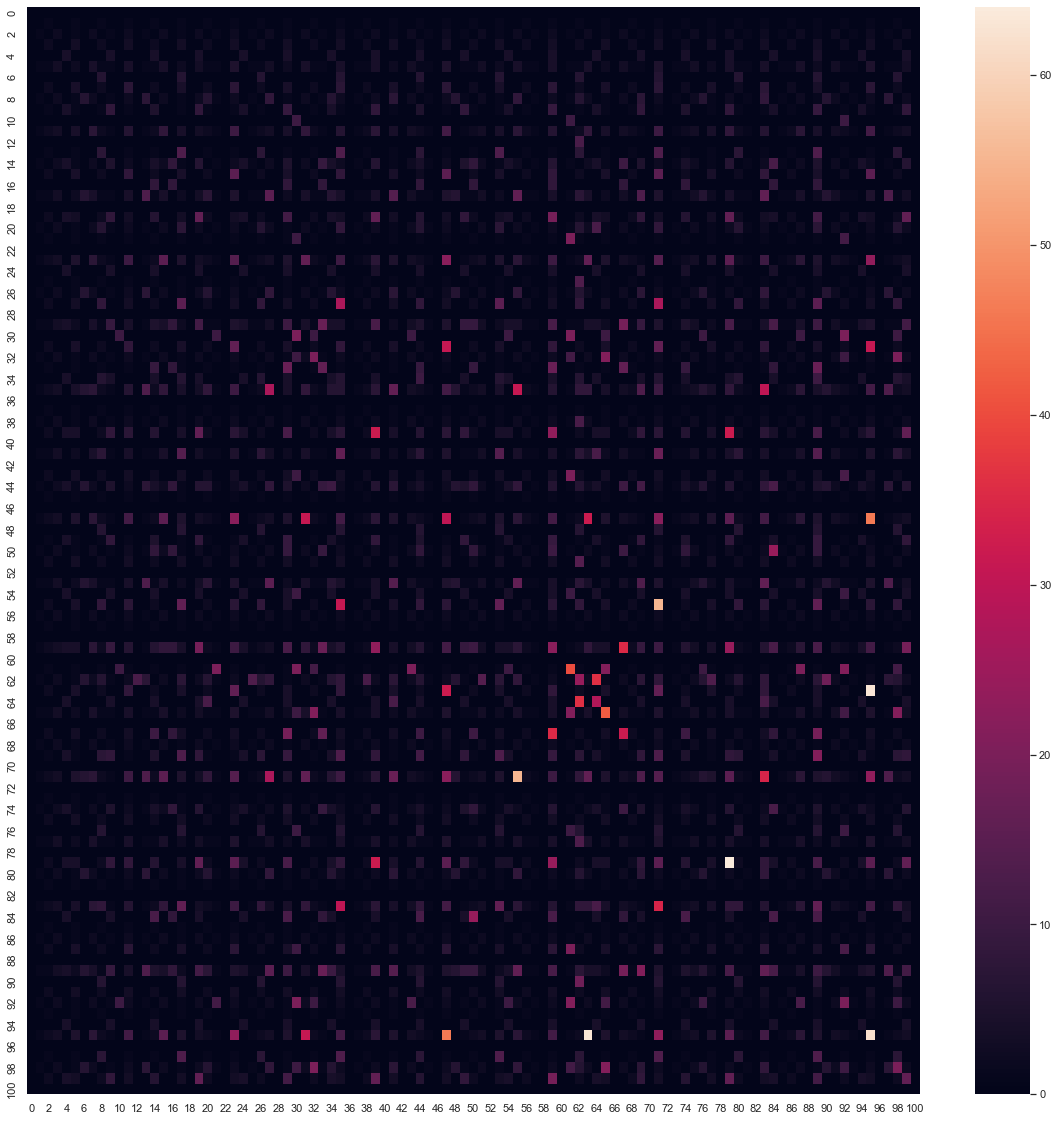

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.heatmap(num_sol_log)